In [34]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation
from IPython.display import clear_output
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pathlib import Path
import pathlib
import tensorflow_hub as hub
# necessary libraries
import os

import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
from skimage.io import imread
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

In [35]:
path=Path("/content/drive/MyDrive/dataset_resnet50")

In [36]:
def get_Label(number):
    labels = {


              0 : 'cracks',
              1 : 'normal',
              2 : 'potholes',

    }
    return labels[number]

In [37]:
!pip install mplcyberpunk
!pip install split-folders

import pathlib, os, random, mplcyberpunk
import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
splitfolders.ratio(path, output='Main_data', seed=123, ratio=(0.70, 0.15, 0.15),
                  group_prefix=None)

Copying files: 1029 files [00:07, 141.43 files/s]


In [40]:
import cv2
from PIL import Image
image_path = '/content/Main_data/train/cracks/00002.jpg'
image = cv2.imread(image_path)
im = Image.open(image_path)
height, width, _ = image.shape

print("Image width:", width)
print("Image height:", height)

Image width: 227
Image height: 227


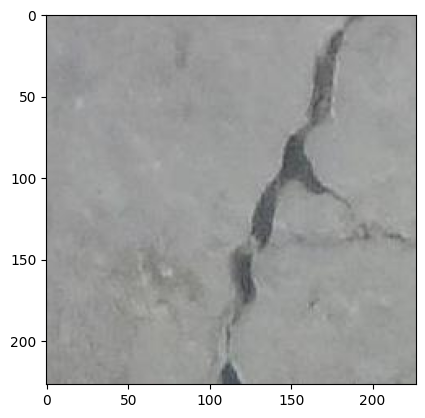

In [41]:
plt.imshow(im)

In [42]:
train_dataset_path = '/content/Main_data/train'
validation_dataset_path = '/content/Main_data/val'
test_path='/content/Main_data/test'

In [43]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

In [44]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 719 images belonging to 3 classes.


In [45]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 153 images belonging to 3 classes.
Found 157 images belonging to 3 classes.


In [46]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : cracks
1 : normal
2 : potholes


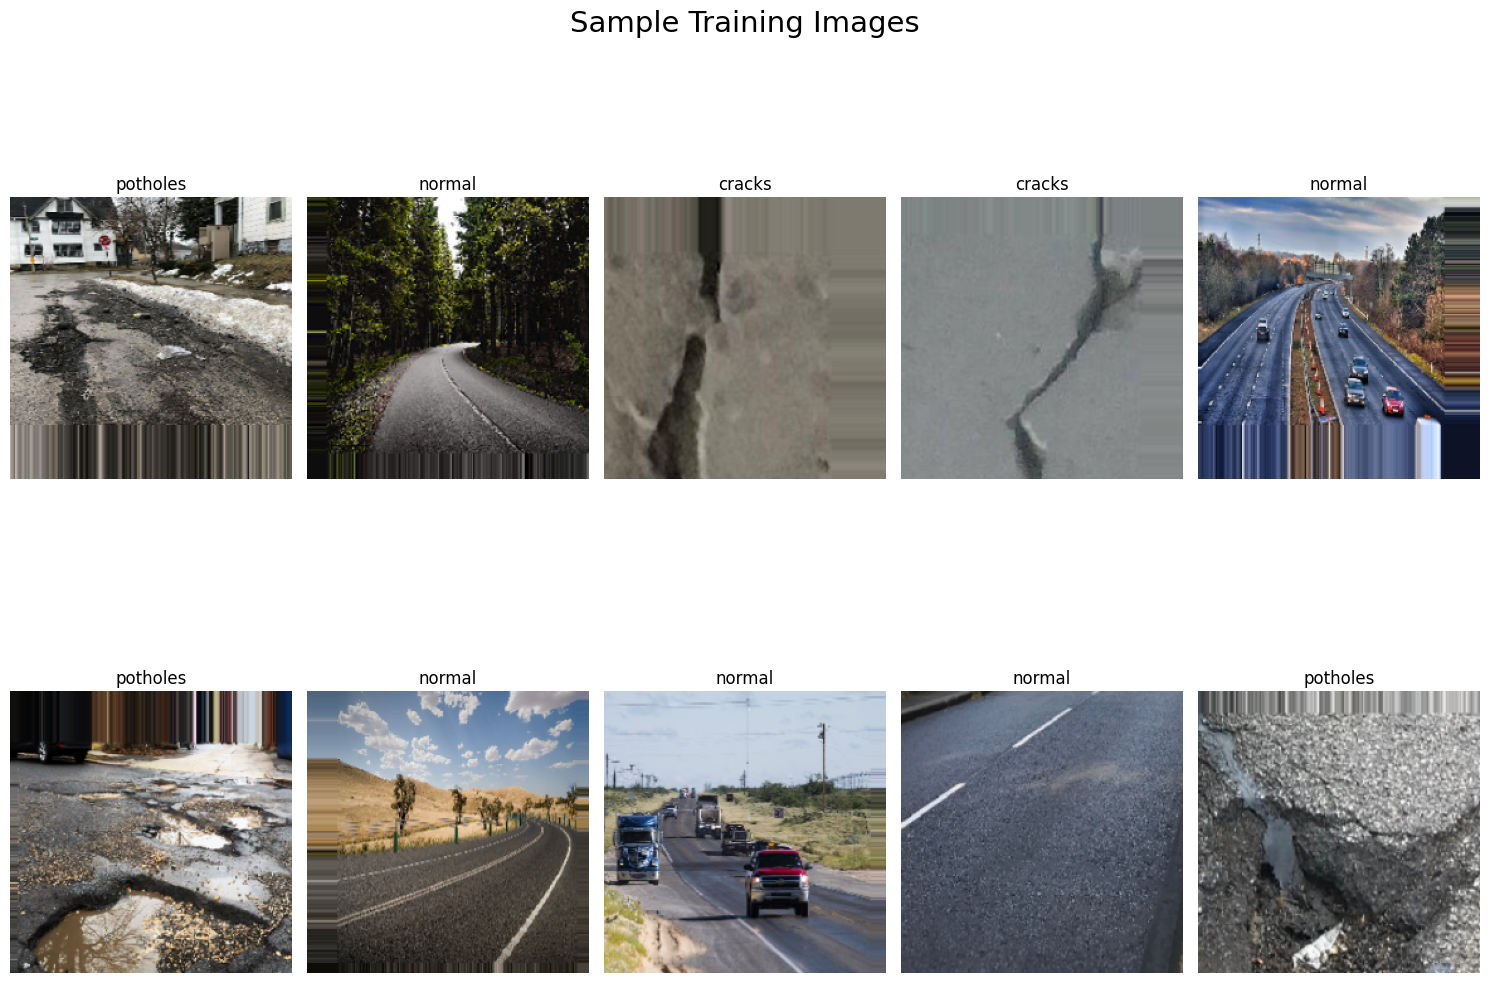

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [48]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model,layers
import tensorflow as tf
import keras
from tensorflow.keras import optimizers, applications, Sequential, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


In [49]:
img_adjust_layer = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input, input_shape=[224,224, 3])
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

model = tf.keras.Sequential([
        tf.keras.layers.BatchNormalization(renorm=True),
        img_adjust_layer,
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        #tf.keras.layers.BatchNormalization(renorm=True),
        #tf.keras.layers.Dropout(0.5)(x)
        tf.keras.layers.Dense(3, activation='softmax')
    ])



In [50]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(epsilon=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [51]:
STEPS_PER_EPOCH = train_generator.n // BATCH_SIZE
VALID_STEPS = validation_generator.n // BATCH_SIZE

history = model.fit(train_generator,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=VALID_STEPS)

Epoch 1/30
22/22 [==============================] - 27s 914ms/step - loss: 1.1582 - accuracy: 0.3712 - val_loss: 0.9699 - val_accuracy: 0.5781
Epoch 2/30
22/22 [==============================] - 22s 989ms/step - loss: 0.9474 - accuracy: 0.5051 - val_loss: 0.8396 - val_accuracy: 0.6797
Epoch 3/30
22/22 [==============================] - 18s 837ms/step - loss: 0.8209 - accuracy: 0.6041 - val_loss: 0.5719 - val_accuracy: 0.7734
Epoch 4/30
22/22 [==============================] - 19s 885ms/step - loss: 0.6591 - accuracy: 0.7001 - val_loss: 0.5093 - val_accuracy: 0.7500
Epoch 5/30
22/22 [==============================] - 22s 1s/step - loss: 0.6001 - accuracy: 0.7380 - val_loss: 0.4144 - val_accuracy: 0.8125
Epoch 6/30
22/22 [==============================] - 19s 860ms/step - loss: 0.5026 - accuracy: 0.7817 - val_loss: 0.3115 - val_accuracy: 0.8594
Epoch 7/30
22/22 [==============================] - 19s 852ms/step - loss: 0.4766 - accuracy: 0.7656 - val_loss: 0.3047 - val_accuracy: 0.8984
Ep

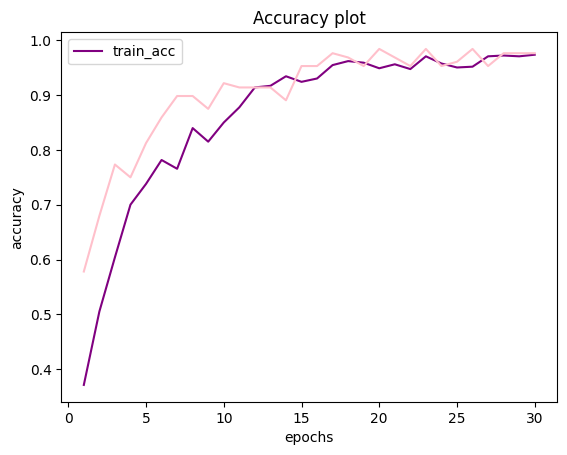

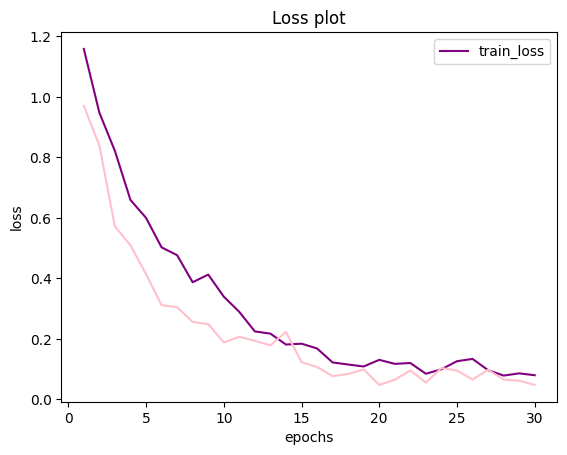

In [52]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss"])
plt.show()

In [53]:
results = model.evaluate(test_generator, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 94.90%


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, None, None, 3)     21        
 chNormalization)                                                
                                                                 
 lambda_1 (Lambda)           (None, None, None, 3)     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                      

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [56]:
predictions = np.argmax(model.predict(test_generator), axis=1)

cm_resnet50 = confusion_matrix(test_generator.labels, predictions)
clr_resnet50= classification_report(test_generator.labels, predictions, target_names=test_generator.class_indices, zero_division=0)

5/5 [==============================] - 2s 215ms/step


In [72]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [73]:
image_path = '/content/Main_data/train/potholes/19.jpg'
img = image.load_img(image_path, target_size=(224,224,3))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = train_generator.class_indices
predicted_class_label = list(class_labels.keys())[predicted_class_index]

print('Predicted class:', predicted_class_label)

1/1 [==============================] - 0s 36ms/step
Predicted class: potholes


In [74]:
model.save("Resnet50.h5")